Download and install TensorFlow 2. Import TensorFlow into your program:

Note: Upgrade `pip` to install the TensorFlow 2 package. See the [install guide](https://www.tensorflow.org/install) for details.

In [1]:
#pip install tensorflow==2

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

y = 3


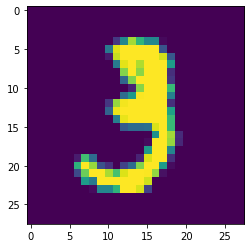

In [4]:
index=10
plt.imshow(x_train[index])
print ("y = " + str(np.squeeze(y_train[index])))

Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "[logits](https://developers.google.com/machine-learning/glossary#logits)" or "[log-odds](https://developers.google.com/machine-learning/glossary#log-odds)" scores, one for each class.

In [6]:
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.19456065,  0.4431454 ,  0.14085364,  0.18728527, -0.7826821 ,
        -0.7164449 ,  0.02099256, -0.31619006,  0.41525024,  0.23261371]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to "probabilities" for each class: 

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.1145795 , 0.14691491, 0.1085881 , 0.11374892, 0.04312169,
        0.04607467, 0.09632239, 0.06875285, 0.14287333, 0.11902361]],
      dtype=float32)

Note: It is possible to bake this `tf.nn.softmax` in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to
provide an exact and numerically stable loss calculation for all models when using a softmax output. 

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class:
It is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.log(1/10) ~= 2.3`.

In [9]:
loss_fn(y_train[:1], predictions).numpy()

3.077492

In [10]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

The `Model.fit` method adjusts the model parameters to minimize the loss: 

In [11]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2960 - accuracy: 0.9143
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1437 - accuracy: 0.9565
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1079 - accuracy: 0.9668
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0878 - accuracy: 0.9729
Epoch 5/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0741 - accuracy: 0.9772


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [12]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 0s - loss: 0.0360 - accuracy: 0.9773


[0.06861145434323698, 0.9773]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

##### Saving the Model

In [45]:
# import pickle
# with open("mnistdigitrecognizer.pickle", "wb") as f:
#      pickle.dump(model,f)

##### Loading the  Model

In [44]:
# pickle_in=open("mnistdigitrecognizer.pickle", "rb")
# mysavedmodel=pickle.load(pickle_in)

## Testing the Model

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [15]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [16]:
#print(x_test[:1])
x_test[0:1].shape

(1, 28, 28)

In [17]:
predictions = probability_model(x_test[:1])

In [18]:
predictions

<tf.Tensor: id=30015, shape=(1, 10), dtype=float32, numpy=
array([[5.2170780e-08, 1.7885302e-08, 2.5186291e-06, 4.0541723e-05,
        9.7225535e-12, 1.0537702e-07, 5.0153959e-16, 9.9995637e-01,
        5.7453789e-08, 3.5031033e-07]], dtype=float32)>

In [19]:
print ("y = " + str(np.squeeze(y_test[4]))) # y test value
print ("y_pred= " + str(np.argmax(predictions))) # predicted y value
# for i in range(5):
#   print ("y = " + str(np.squeeze(y_test[i])))
#   print("y_pred" + str(i)+"=" + str(np.argmax(predictions[i])))


y = 4
y_pred= 7


### Testing using python turtle generated image 

**Convert any image to MNIST type dataset**

In [32]:
from PIL import Image, ImageFilter
import io

def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    #print(tva)
    return tva

x=imageprepare('./digit.png')#file path here
print(len(x))# mnist IMAGES are 28x28=784 pixels

784


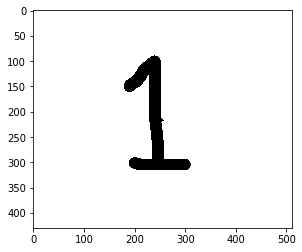

In [33]:
im = Image.open('digit.png')
plt.imshow(im)
plt.show()

In [34]:
#print(x)

In [35]:
temp = np.zeros((1,28,28))
my_test=np.array(x)
my_test=np.reshape(my_test,(28,28))
temp[0]=my_test
temp[0].shape

(28, 28)

In [36]:
predict_myimg = probability_model(temp)
predict_myimg

<tf.Tensor: id=30057, shape=(1, 10), dtype=float32, numpy=
array([[0.00222529, 0.36093593, 0.04215368, 0.0110345 , 0.3693781 ,
        0.0741801 , 0.06153765, 0.03954607, 0.03029695, 0.00871168]],
      dtype=float32)>

In [37]:
print ("y_pred= " + str(np.argmax(predict_myimg)))

y_pred= 4
